## S&P 500 dataset

In [ ]:
# Read the S&P Data
#sp500_df = pd.read_csv(sp500_data_path)
#sp500_df.head()

In [ ]:
#get the datatypes
#sp500_df.dtypes

In [ ]:
#convert date column to datetime data type
#sp500_df["Date"] = pd.to_datetime(sp500_df["Date"])


In [ ]:
#check if Date col's datatype has indeed been changed to datetime format
#sp500_df.dtypes

In [ ]:
#quick description of the dataset - might need to omit
#sp500_df.describe()

In [ ]:
#export as cleaned CSV
#sp500_df.to_csv("..\Data-cleaned\sp500_data-cleaned.csv")

# Full crypto dataset

In [2]:
# Dependencies
import pandas as pd
import os

# File to Load (Remember to change these)
crypto_data_path = ('../Crypto/bitcoin.csv')
#sp500_data_path = 'sp500_cleaned.csv'

In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error

# Any results you write to the current directory are saved as output.
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA

In [5]:
# Read the Crypto Data
crypto_df = pd.read_csv(crypto_data_path)
crypto_df.head()

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03 00:00:00.000,286.572,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04 00:00:00.000,260.936,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05 00:00:00.000,273.220,1.550381e+08,3.740880e+09,bitcoin


In [6]:
#renaming columns
crypto_df = crypto_df.rename(columns = {
    "date": "Date", 
    "price": "Open", 
    "total_volume": "Volume", 
    "market_cap": "Market_Capitalization", 
    "coin_name": "Coin_Name"})
crypto_df

,Date,Open,Volume,Market_Capitalization,Coin_Name
0,2015-01-01 00:00:00.000,313.992000,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446000,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03 00:00:00.000,286.572000,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04 00:00:00.000,260.936000,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05 00:00:00.000,273.220000,1.550381e+08,3.740880e+09,bitcoin
...,...,...,...,...,...
2937,2023-01-17 00:00:00.000,21175.337737,3.480939e+10,4.077604e+11,bitcoin
2938,2023-01-18 00:00:00.000,21156.783931,3.327884e+10,4.074051e+11,bitcoin
2939,2023-01-19 00:00:00.000,20726.844969,4.061206e+10,3.993496e+11,bitcoin
2940,2023-01-20 00:00:00.000,21081.671022,2.914453e+10,4.062584e+11,bitcoin


In [7]:
#check data types of cols in dataframe
crypto_df.dtypes

Date                      object
Open                     float64
Volume                   float64
Market_Capitalization    float64
Coin_Name                 object
dtype: object

In [8]:
#convert date column to datetime data type
#convert total_volume and market_cap columns to int
crypto_df["Date"] = pd.to_datetime(crypto_df["Date"])

#crypto_df["total_volume"] = crypto_df["total_volume"].astype(int, errors = 'ignore').astype(str)
#crypto_df["market_cap"] = crypto_df["market_cap"].astype(np.int64)

crypto_df

,Date,Open,Volume,Market_Capitalization,Coin_Name
0,2015-01-01,313.992000,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02,314.446000,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03,286.572000,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04,260.936000,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05,273.220000,1.550381e+08,3.740880e+09,bitcoin
...,...,...,...,...,...
2937,2023-01-17,21175.337737,3.480939e+10,4.077604e+11,bitcoin
2938,2023-01-18,21156.783931,3.327884e+10,4.074051e+11,bitcoin
2939,2023-01-19,20726.844969,4.061206e+10,3.993496e+11,bitcoin
2940,2023-01-20,21081.671022,2.914453e+10,4.062584e+11,bitcoin


In [9]:
#check if date column has changed from object to datetime and in a format we want
crypto_df.dtypes

Date                     datetime64[ns]
Open                            float64
Volume                          float64
Market_Capitalization           float64
Coin_Name                        object
dtype: object

In [10]:
#filter the dataframe to only get our 5 years of data - Jan 1, 2018 to Dec 31, 2022 - and reseting the index
crypto_df = crypto_df[(crypto_df["Date"] > "2018-01-01") & (crypto_df["Date"] < "2022-12-31")]
crypto_df.reset_index(drop = True, inplace=True)
crypto_df

,Date,Open,Volume,Market_Capitalization,Coin_Name
0,2018-01-02,15321.932852,4.130218e+09,2.570796e+11,bitcoin
1,2018-01-03,15583.885538,3.310356e+09,2.615052e+11,bitcoin
2,2018-01-04,15976.365194,4.217387e+09,2.681247e+11,bitcoin
3,2018-01-05,18336.922980,6.275688e+09,3.077740e+11,bitcoin
4,2018-01-06,18343.662493,4.240920e+09,3.079261e+11,bitcoin
...,...,...,...,...,...
1819,2022-12-26,16842.177040,1.257445e+10,3.238686e+11,bitcoin
1820,2022-12-27,16900.081872,1.257500e+10,3.250369e+11,bitcoin
1821,2022-12-28,16701.840211,1.743606e+10,3.213515e+11,bitcoin
1822,2022-12-29,16538.906094,1.911361e+10,3.182889e+11,bitcoin


In [11]:
#quick description of all cryptos - might need to omit
crypto_df.groupby("Coin_Name").describe()

Open                                                      \
            count         mean           std         min          25%   
Coin_Name                                                               
bitcoin    1824.0  20350.30104  17023.887035  3216.62715  7659.317502   

                                                     Volume                \
                    50%           75%           max   count          mean   
Coin_Name                                                                   
bitcoin    10944.795116  33929.164323  67617.015545  1824.0  2.575402e+10   

           ...                             Market_Capitalization  \
           ...           75%           max                 count   
Coin_Name  ...                                                     
bitcoin    ...  3.491310e+10  1.788941e+11                1824.0   

                                                                   \
                   mean           std           min           25%   
Coin_Name                                                           
bitcoin    3.787542e+11  3.235129e+11  5.599852e+10  1.352323e+11   

                                                     
                    50%           75%           max  
Coin_Name                                            
bitcoin    1.962694e+11  6.325522e+11  1.278798e+12  

[1 rows x 24 columns]

In [12]:
#export the dataframe to a csv as one master file
#crypto_df.to_csv("..\Data-cleaned\crypto.csv", index=False)

In [13]:
#full_crypto_df = full_crypto_df.groupby(["Coin_Name","Date"])['Open'].sum().reset_index()
#full_crypto_df.head()

In [14]:
crypto_df.dtypes

Date                     datetime64[ns]
Open                            float64
Volume                          float64
Market_Capitalization           float64
Coin_Name                        object
dtype: object

In [128]:
#btc_df.columns

In [16]:
#btc_df = btc_df.filter(items=["Coin_Name"], axis=0)
#btc_df

#df = df.filter(items = [2], axis=0)


In [17]:
crypto_df = crypto_df.sort_index()
crypto_df.head()

,Date,Open,Volume,Market_Capitalization,Coin_Name
0,2018-01-02,15321.932852,4.130218e+09,2.570796e+11,bitcoin
1,2018-01-03,15583.885538,3.310356e+09,2.615052e+11,bitcoin
2,2018-01-04,15976.365194,4.217387e+09,2.681247e+11,bitcoin
3,2018-01-05,18336.922980,6.275688e+09,3.077740e+11,bitcoin
4,2018-01-06,18343.662493,4.240920e+09,3.079261e+11,bitcoin


In [18]:
crypto_df = crypto_df.set_index('Date')
crypto_df.index

DatetimeIndex(['2018-01-02 00:00:00', '2018-01-03 00:00:00',
               '2018-01-04 00:00:00', '2018-01-05 00:00:00',
               '2018-01-06 00:00:00', '2018-01-07 00:00:00',
               '2018-01-08 00:00:00', '2018-01-09 00:00:00',
               '2018-01-10 00:00:00', '2018-01-11 00:00:00',
               ...
               '2022-12-21 00:00:00', '2022-12-22 00:00:00',
               '2022-12-23 00:00:00', '2022-12-24 00:00:00',
               '2022-12-25 00:00:00', '2022-12-26 00:00:00',
               '2022-12-27 00:00:00', '2022-12-28 00:00:00',
               '2022-12-29 00:00:00', '2022-12-30 00:00:00'],
              dtype='datetime64[ns]', name='Date', length=1824, freq=None)

Text(0, 0.5, 'Daily Bitcoin price')

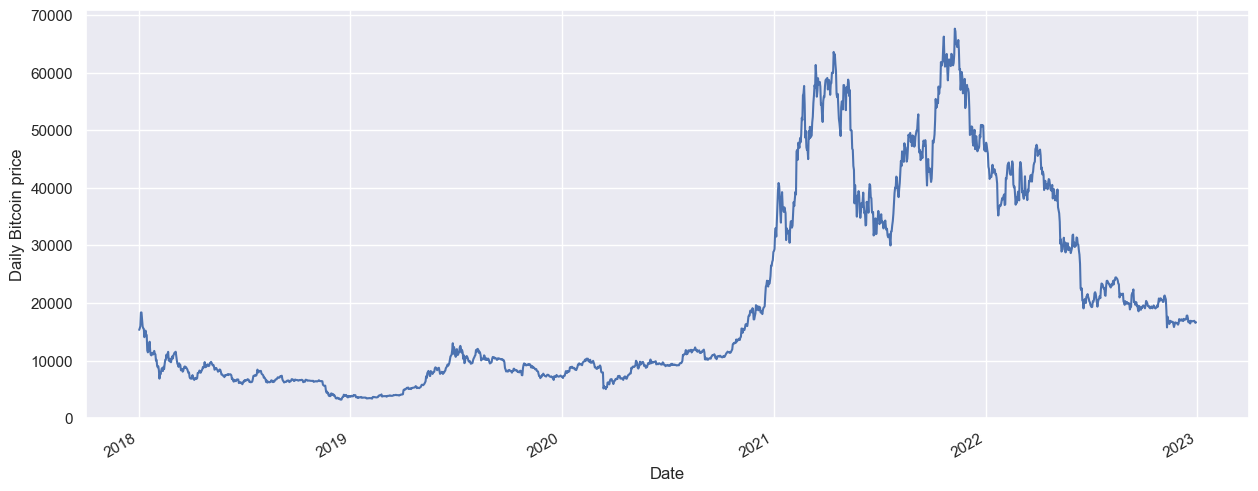

In [19]:
crypto_df['Open'].plot()
plt.ylabel("Daily Bitcoin price")

# Bitcoin price prediction with ARIMA

In this model - predict the Opening price of Bitcoin, and create a new object eliminating other columns

In [20]:
crypto_df = crypto_df['Open']

Text(0, 0.5, 'Weekly bitcoin price')

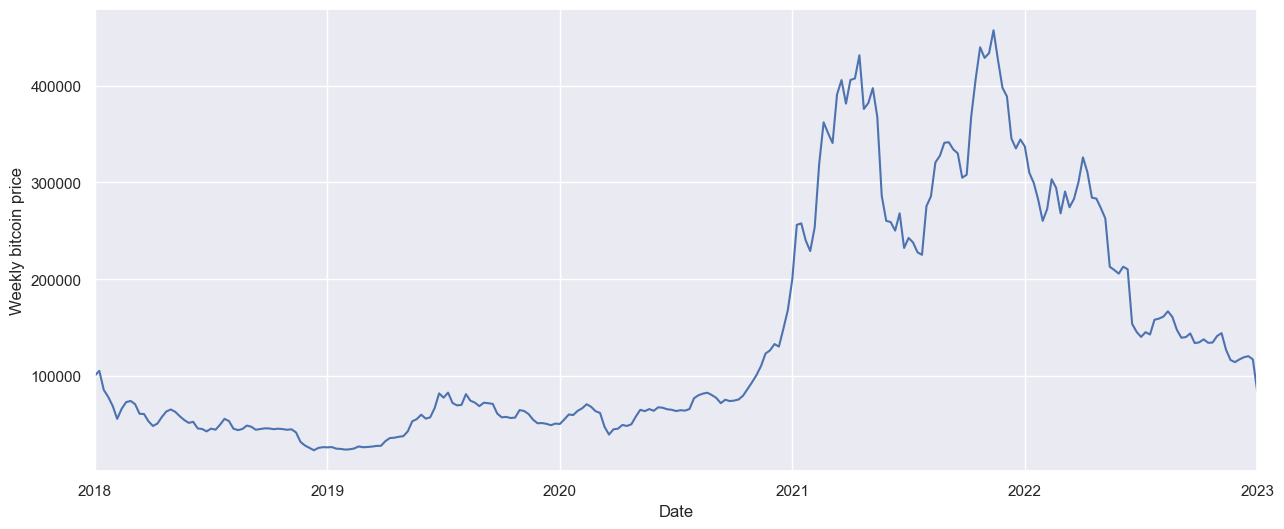

In [21]:
#Weekly crypto prices
weekly = crypto_df.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly bitcoin price')

<AxesSubplot:xlabel='Date'>

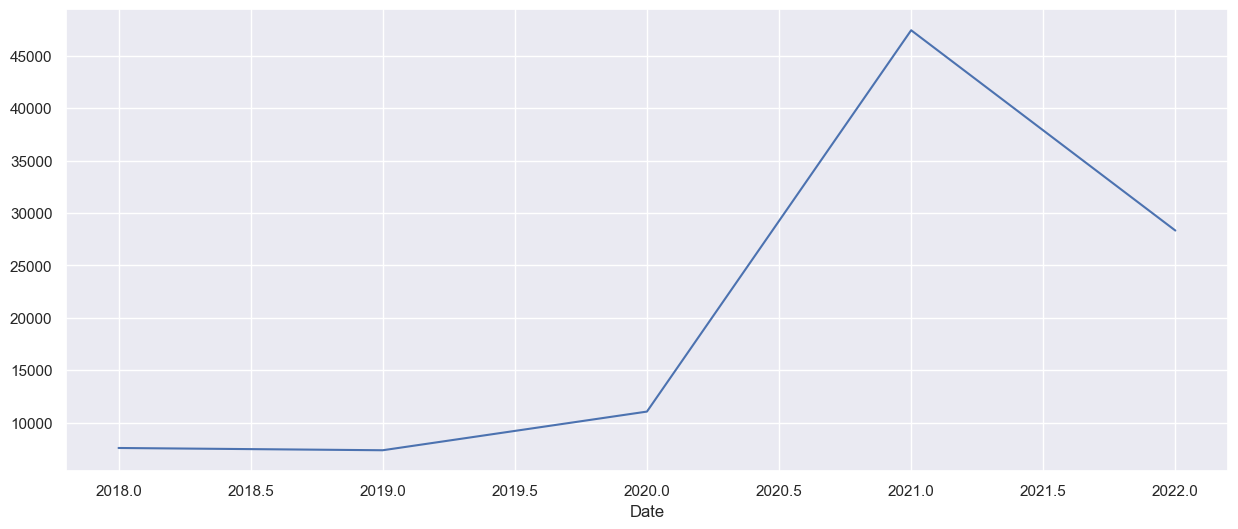

In [22]:
# Average yearly prices
by_year = crypto_df.groupby(crypto_df.index.year).mean()
by_year.plot()

<AxesSubplot:>

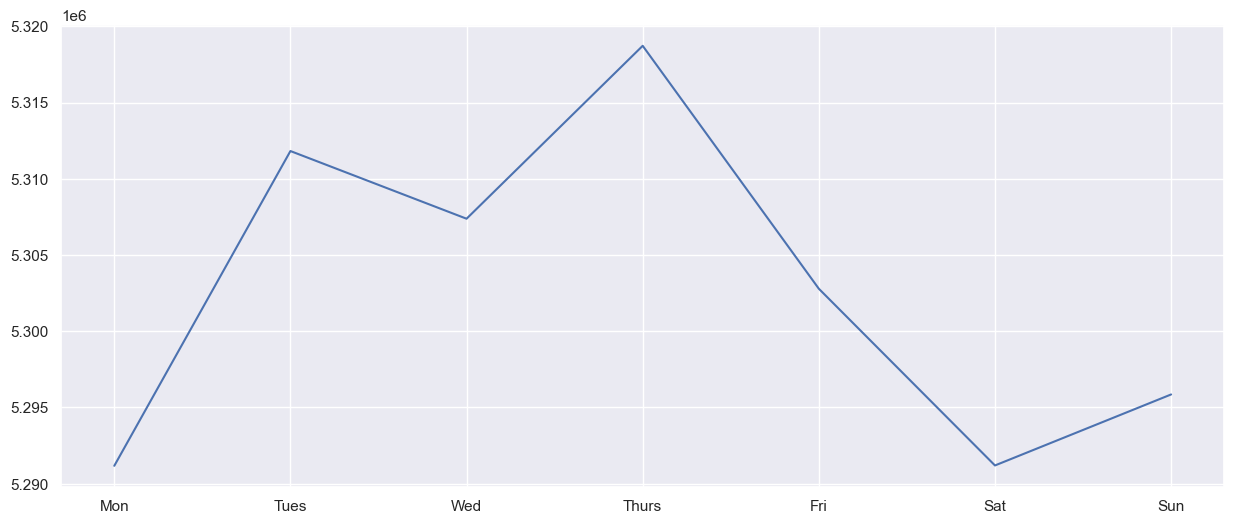

In [23]:
# Prices by day of the week
by_weekday = crypto_df.groupby(crypto_df.index.dayofweek).sum()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()


<AxesSubplot:>

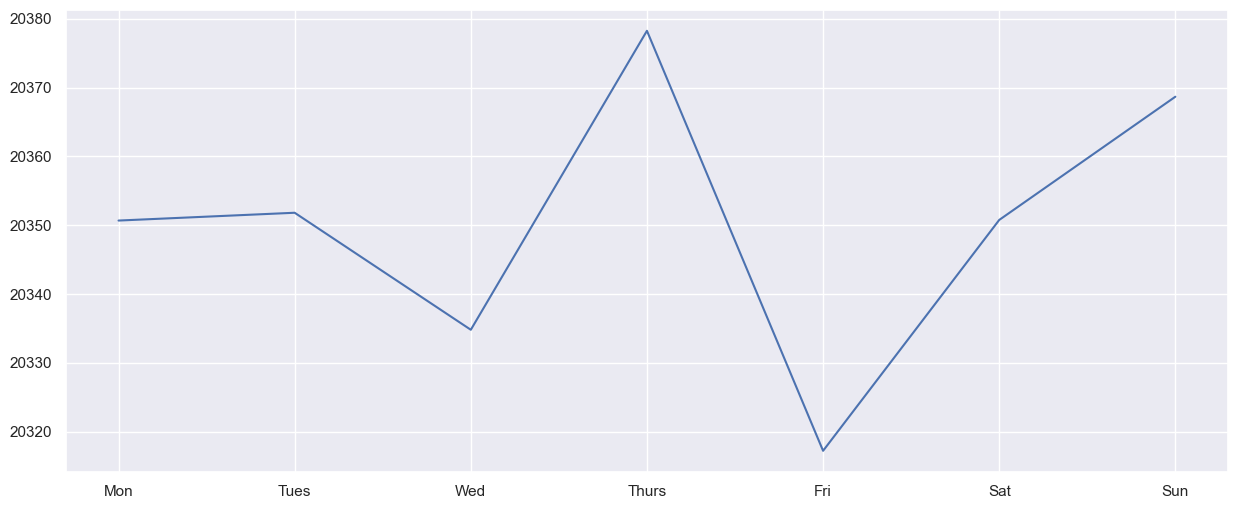

In [24]:
# Average prices for each day of the week
by_weekday = crypto_df.groupby(crypto_df.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()

<AxesSubplot:xlabel='Date'>

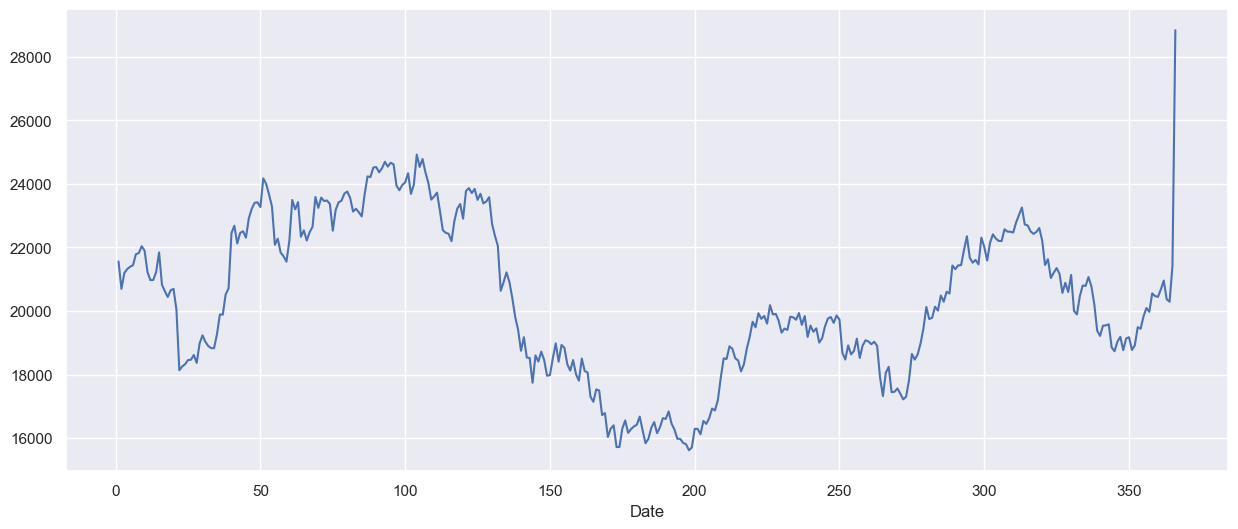

In [25]:
# Average prices for day of the year
by_day = crypto_df.groupby(crypto_df.index.dayofyear).mean()
by_day.plot()

<AxesSubplot:xlabel='Date'>

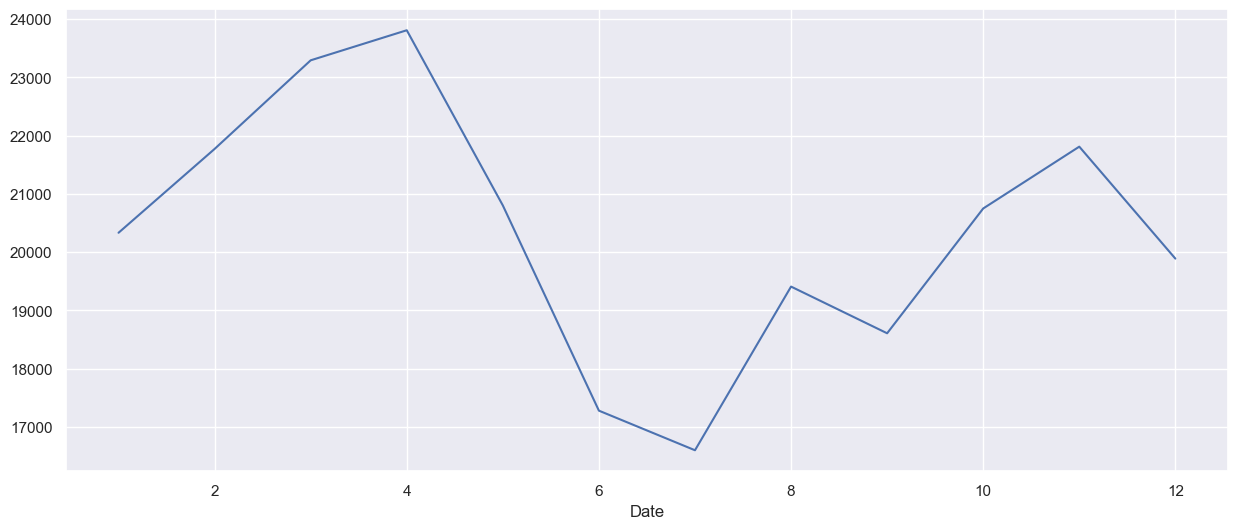

In [26]:
# Average prices per month
by_month = crypto_df.groupby(crypto_df.index.month).mean()
by_month.plot()

<AxesSubplot:xlabel='Date'>

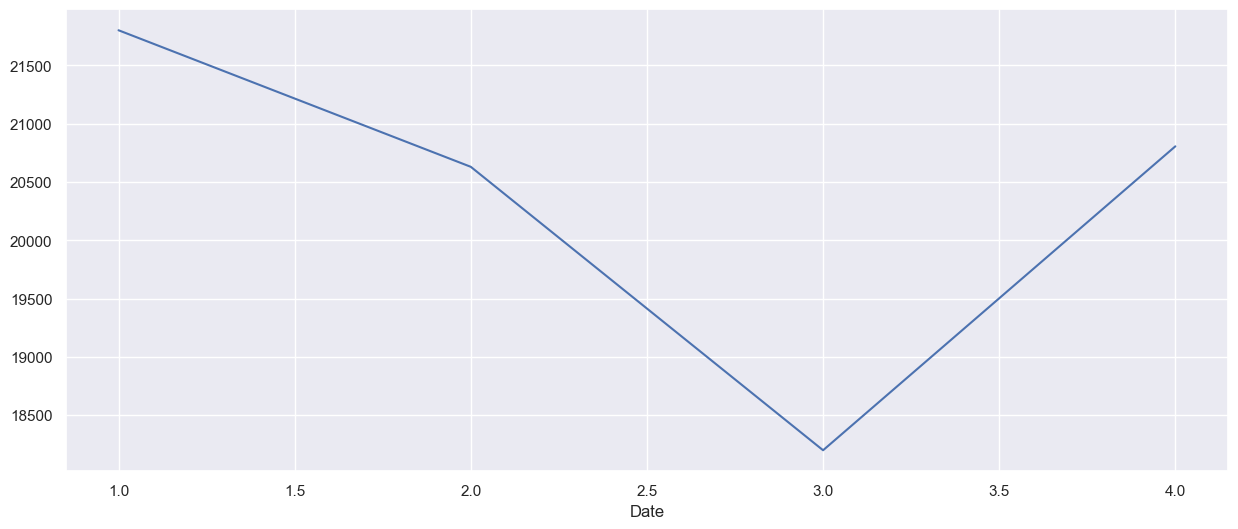

In [27]:
# Average price per quarter
by_quarter = crypto_df.groupby(crypto_df.index.quarter).mean()
by_quarter.plot()

Date
1    AxesSubplot(0.125,0.2;0.775x0.68)
2    AxesSubplot(0.125,0.2;0.775x0.68)
3    AxesSubplot(0.125,0.2;0.775x0.68)
4    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Open, dtype: object

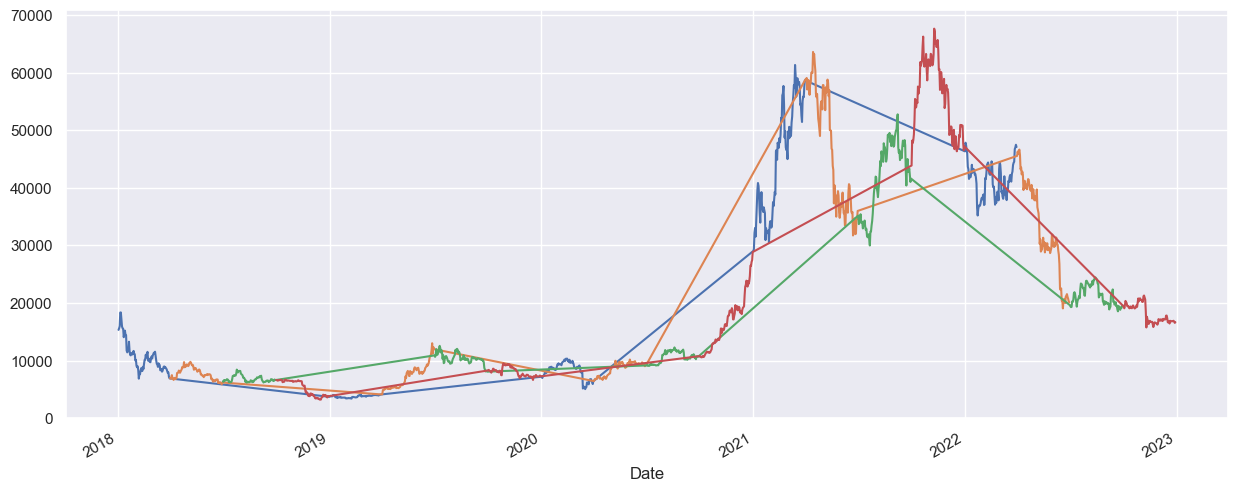

In [28]:
# Pirces for each quarter
by_quarter = crypto_df.groupby(crypto_df.index.quarter)
by_quarter.plot()

<AxesSubplot:xlabel='Date'>

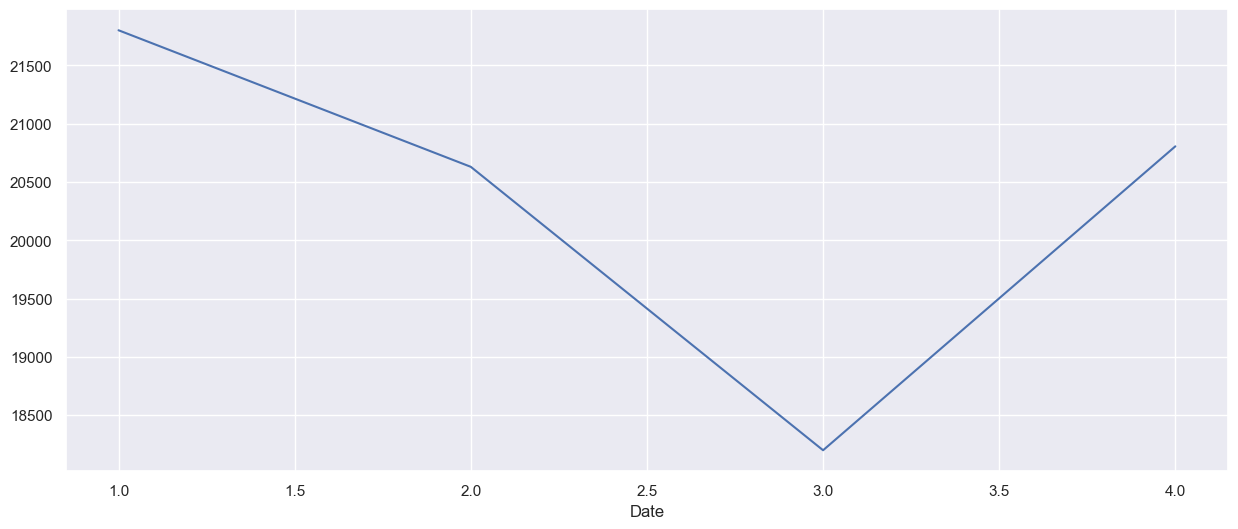

In [29]:
# Average overall quarterly prices
by_quarter_overall = crypto_df.groupby(crypto_df.index.quarter).mean()
by_quarter_overall.plot()

<AxesSubplot:title={'center':'Weekends'}, xlabel='Date'>

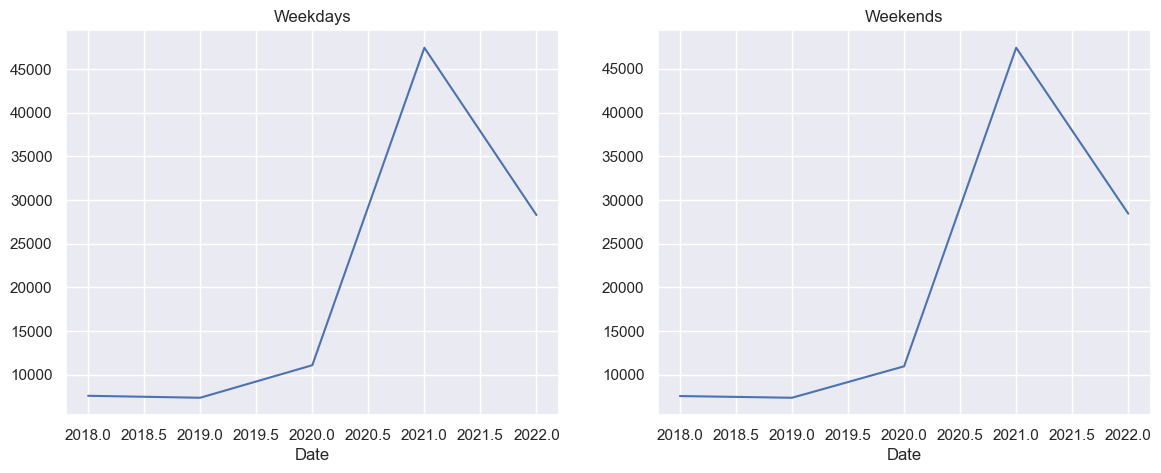

In [30]:
# Prices per weekday and weekends
weekend = np.where(crypto_df.index.weekday < 5, 'Weekday', 'Weekend')
by_time = crypto_df.groupby([weekend, crypto_df.index.year]).mean()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays')
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends')

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

constant mean
constant variance
an autocovariance that does not depend on time.

In [31]:
ts = crypto_df

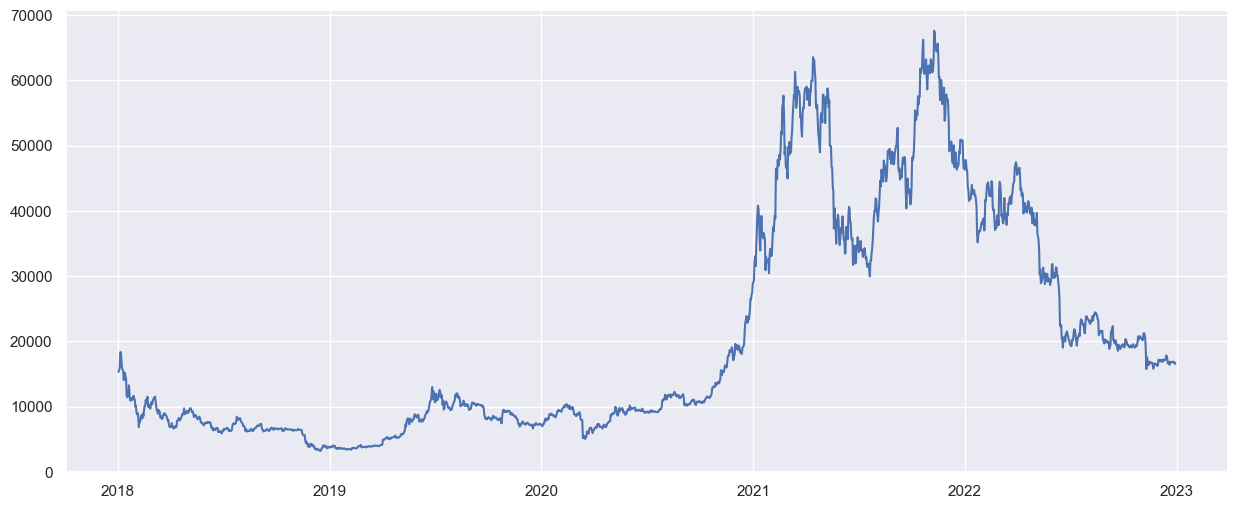

In [32]:
plt.plot(ts)

Fluctuating trend with seasonality

## Dickey-Fuller Test:

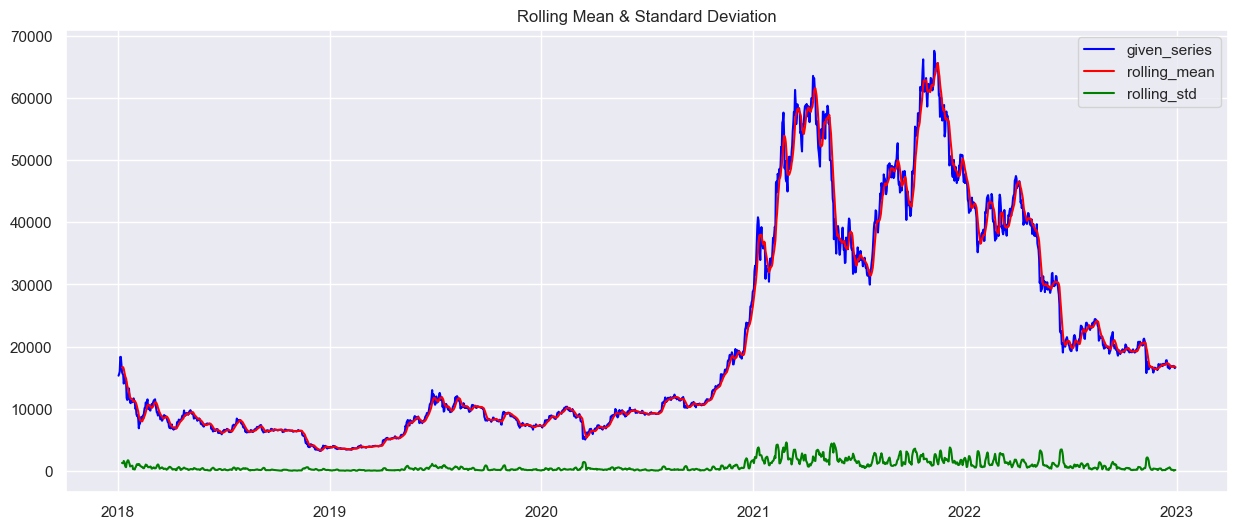

Results of Dickey-Fuller Test:
Test Statistic                   -1.367465
p-value                           0.597771
#Lags Used                       24.000000
Number of Observations Used    1799.000000
Critical Value (1%)              -3.433990
Critical Value (5%)              -2.863148
Critical Value (10%)             -2.567626
dtype: float64


In [132]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
test_for_stationary(ts)   

The test statistic is very large compared to the crtical value. The above series show that rolling mean value varies with time and is not stationary. The series needs to be Stationarized. We need to eliminate the trend and seasonality from the series to make it stationary¶

## Transforming the data - (to eliminate trend)

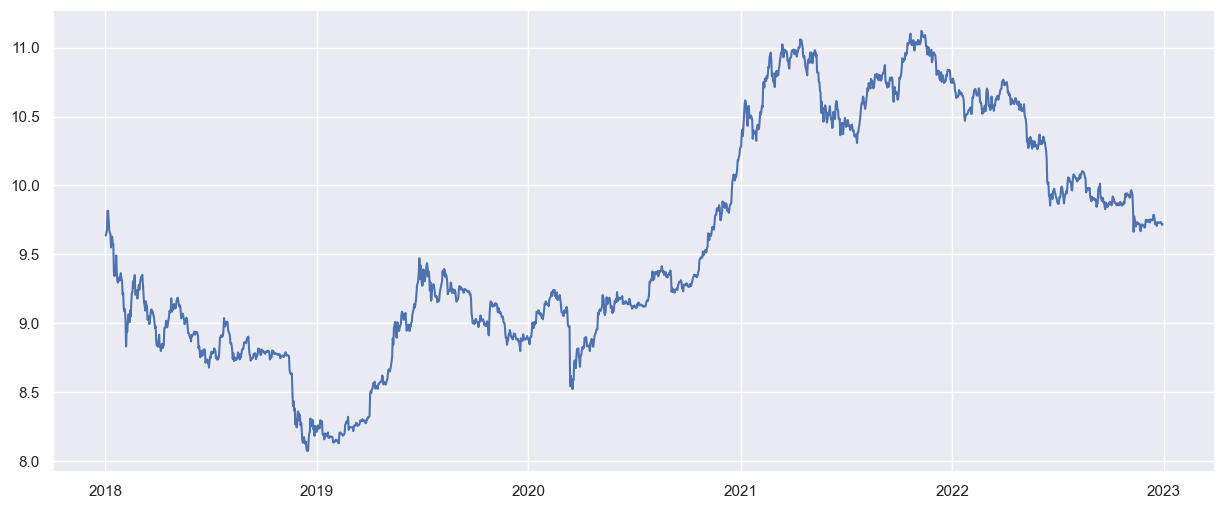

In [34]:
ts_logtransformed = np.log(ts)
plt.plot(ts_logtransformed)

In [35]:
ts_logtransformed.head(10)

Date
2018-01-02    9.637041
2018-01-03    9.653993
2018-01-04    9.678866
2018-01-05    9.816672
2018-01-06    9.817039
2018-01-07    9.743311
2018-01-08    9.674097
2018-01-09    9.655329
2018-01-10    9.649193
2018-01-11    9.550418
Name: Open, dtype: float64

## Smoothing by Rolling average

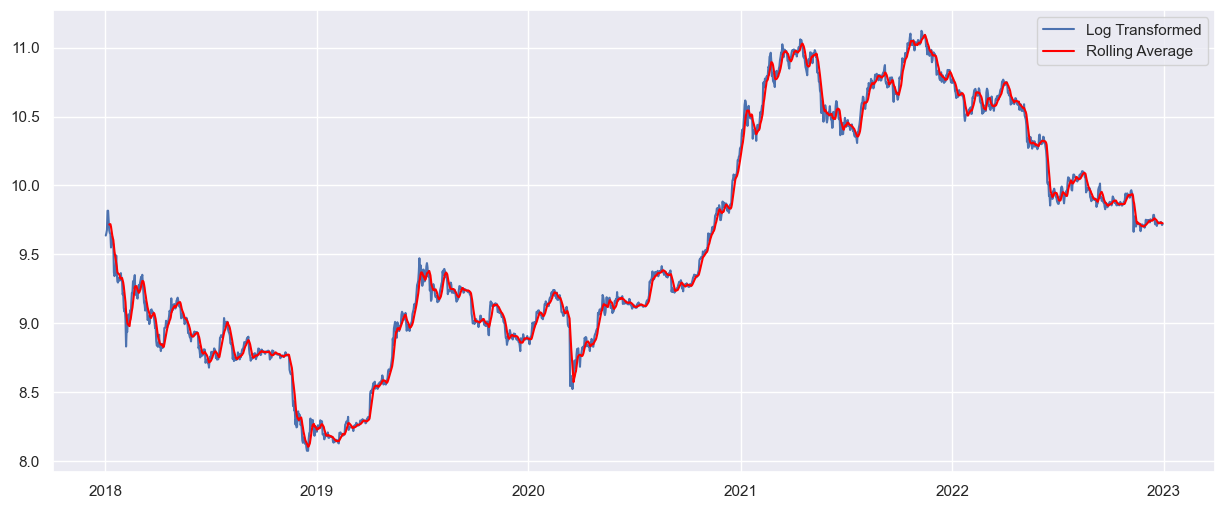

In [131]:
Rolling_average = ts_logtransformed.rolling(window = 7, center= False).mean()
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

The red line shows the rolling mean. Note that since we are taking average of last 7 values, rolling mean is not defined for first 7 values. This can be observed as:

In [37]:
Rolling_average.head(10)

Date
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-06         NaN
2018-01-07         NaN
2018-01-08    9.717288
2018-01-09    9.719901
2018-01-10    9.719215
2018-01-11    9.700866
Name: Open, dtype: float64

Lets subtract this Rolling average from the original log transfomred series.

In [38]:
log_Rolling_difference = ts_logtransformed - Rolling_average
log_Rolling_difference.head(10)
log_Rolling_difference.tail(10)

Date
2022-12-21   -0.002598
2022-12-22    0.000696
2022-12-23    0.005463
2022-12-24    0.002046
2022-12-25    0.005084
2022-12-26    0.003860
2022-12-27    0.003197
2022-12-28   -0.006923
2022-12-29   -0.014346
2022-12-30   -0.006449
Name: Open, dtype: float64

Replace NAN with 0 in the above dataframe to avoid any errors in the future.

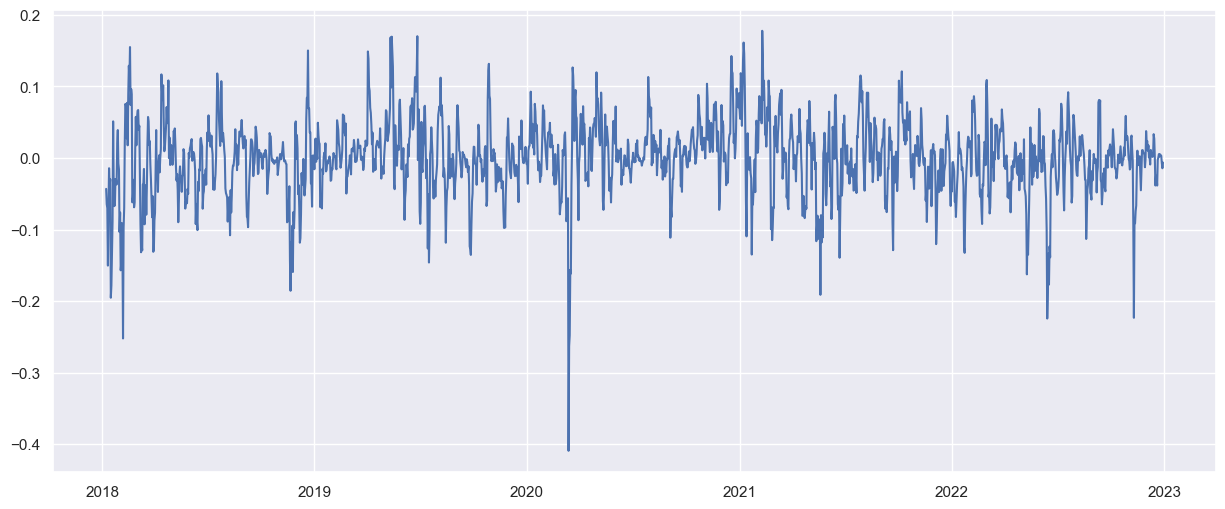

In [39]:
log_Rolling_difference.dropna(inplace=True)
plt.plot(log_Rolling_difference)

test_for_stationary(log_Rolling_difference)

Use exponential_weighted_moving_average instead of moving average to improve the solution

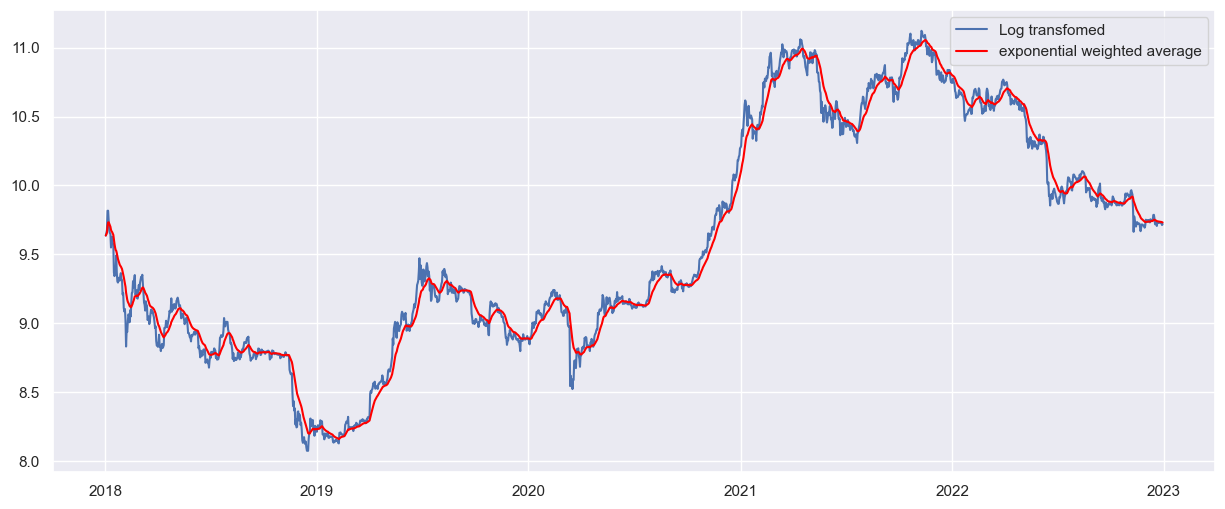

In [40]:
expwighted_avg = ts_logtransformed.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
plt.plot(ts_logtransformed, label = 'Log transfomed')
plt.plot(expwighted_avg, color='red', label = 'exponential weighted average')
plt.legend(loc = 'best')

In [41]:
expwighted_avg.head(10)

Date
2018-01-02    9.637041
2018-01-03    9.645936
2018-01-04    9.658016
2018-01-05    9.703750
2018-01-06    9.731102
2018-01-07    9.733671
2018-01-08    9.722438
2018-01-09    9.710875
2018-01-10    9.701016
2018-01-11    9.678426
Name: Open, dtype: float64

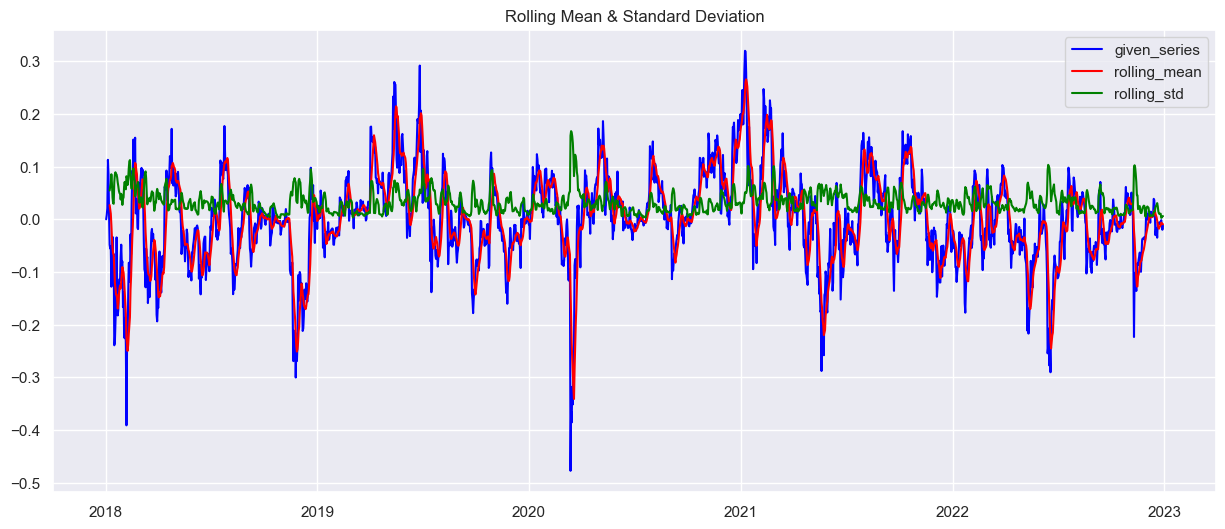

Results of Dickey-Fuller Test:
Test Statistic                -8.322034e+00
p-value                        3.551231e-13
#Lags Used                     1.000000e+00
Number of Observations Used    1.822000e+03
Critical Value (1%)           -3.433944e+00
Critical Value (5%)           -2.863128e+00
Critical Value (10%)          -2.567615e+00
dtype: float64


In [42]:
log_expmovwt_diff = ts_logtransformed - expwighted_avg

test_for_stationary(log_expmovwt_diff)

Now the current time series is stationary,the TS (test_statistic) value is less than 1% critcal value. Since weights are assigned to values from the starting index. Therefore the test works

Few other methods to eliminate Trend and seasonality. Here i am implementing Differencing and Decompostion

<AxesSubplot:xlabel='Date'>

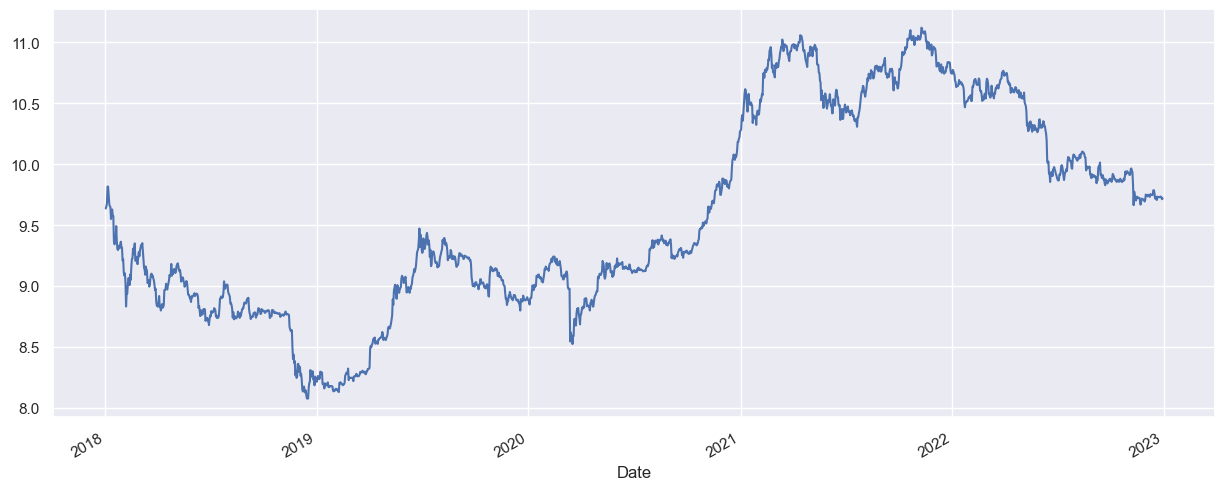

In [43]:
ts_logtransformed.plot()

# Seasonality Adjustment by Differencing

Seasonal components in a Time series can be elimnated by using differencing. If there is a seasonal component at level of one month, then it can be removed on an observation today by substracting the value from last month (Ex: Value(Oct 1)-Value(sep 1), value (oct 2 - Value(Sep 2),.....) We can substract last months data to the presents (giving a gap of 30 days) and first months data would not be available for modeling

I am trying to difference different types of seasonality and test for statioanarized data

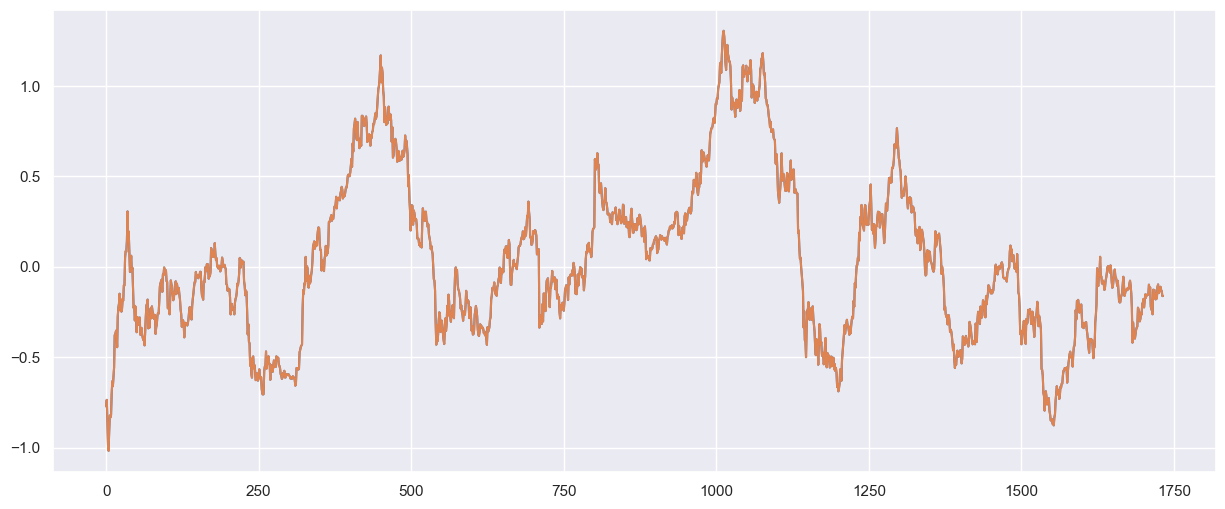

In [44]:
X = ts_logtransformed
diff = list()
days_in_quarter = 91
for i in range(days_in_quarter, len(X)):
    value = X[i] - X[i - days_in_quarter]
    diff.append(value)
plt.plot(diff)
diff = pd.Series(diff)
diff
plt.plot(diff)

Date
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-06         NaN
2018-01-07         NaN
2018-01-08         NaN
2018-01-09    0.018288
2018-01-10   -0.004799
2018-01-11   -0.128448
Name: Open, dtype: float64

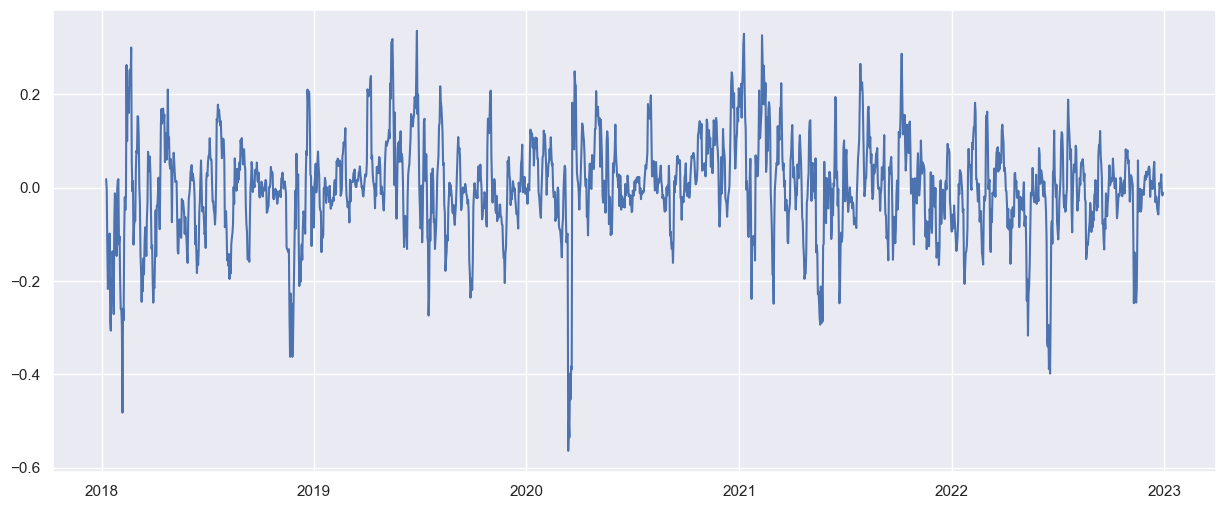

In [45]:
ts_diff_logtrans = ts_logtransformed -ts_logtransformed.shift(7)
plt.plot(ts_diff_logtrans)
ts_diff_logtrans.head(10)

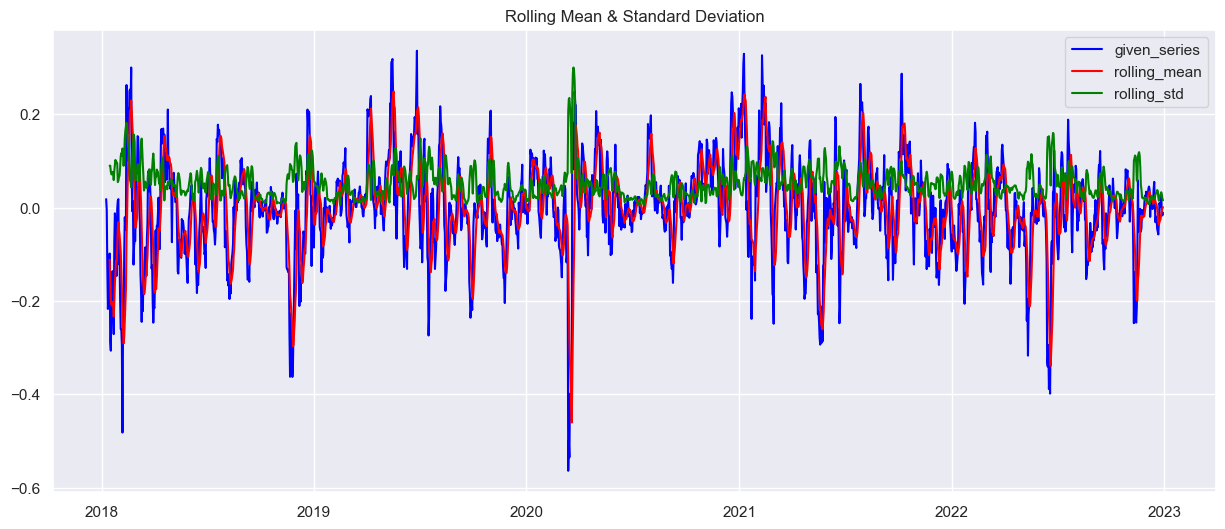

Results of Dickey-Fuller Test:
Test Statistic                -7.231611e+00
p-value                        1.987907e-10
#Lags Used                     2.100000e+01
Number of Observations Used    1.795000e+03
Critical Value (1%)           -3.433998e+00
Critical Value (5%)           -2.863152e+00
Critical Value (10%)          -2.567628e+00
dtype: float64


In [46]:
ts_diff_logtrans.dropna(inplace=True)
test_for_stationary(ts_diff_logtrans)

The Dickey-Fuller test statis is very much less than 1% criticasl value than in the previous case. We can say that the Time series is stationary with 99% confidence

## Decomposing

In [126]:
import statsmodels as sm
import statsmodels.api as sm


decomposition = seasonal_decompose(ts_logtransformed)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_logtransformed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [48]:
decomposed_TS = residual
decomposed_TS.dropna(inplace=True)
test_for_stationary(decomposed_TS)

NameError: name 'residual' is not defined

# Forecasting

In [49]:
#ACF and PACF plots:
lag_acf = acf(ts_diff_logtrans, nlags=30)
lag_pacf = pacf(ts_diff_logtrans, nlags=50, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

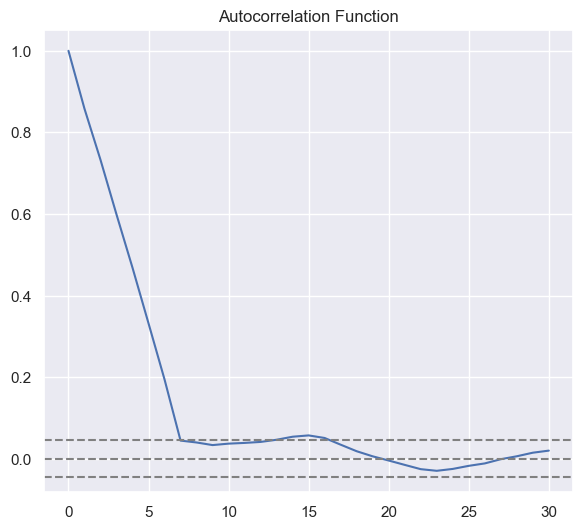

In [50]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


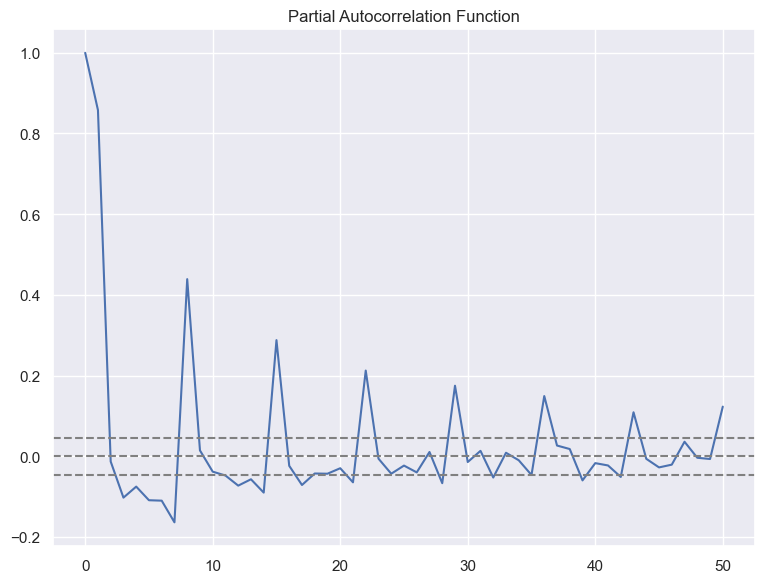

In [51]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff_logtrans)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


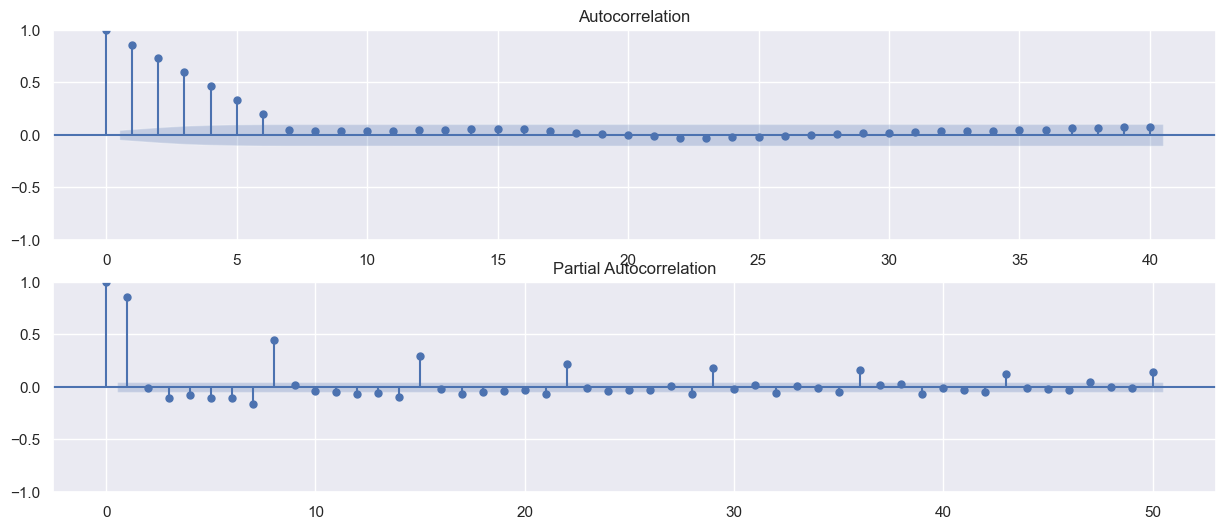

In [52]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax=pyplot.gca(), lags=50)
pyplot.show()

Below are some observations from the plots.

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as: the Lag values are identified from PACF and ACF plots for Autoregression(AR) and Moving Average(MA) parameters, p and q respectively p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2, The PACF shows a significant lag on day 2

q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=18, since the ACF shows a significant lag for 18th day.

The PACF perhaps has some significant lag at 7th, 8th, 12th, 15th day and so on, which also suggests that there is still some seasonality present in the differenced data. We will try different orders of ARIMA models to identify the best order by deriving the residual sum of squares(RSS) for each model. Lower RSS are considered to be the best ones

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [54]:
ts_diff_logtrans = ts_diff_logtrans.fillna(0)

# AR Model

# My code has an issue from here onwards

/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

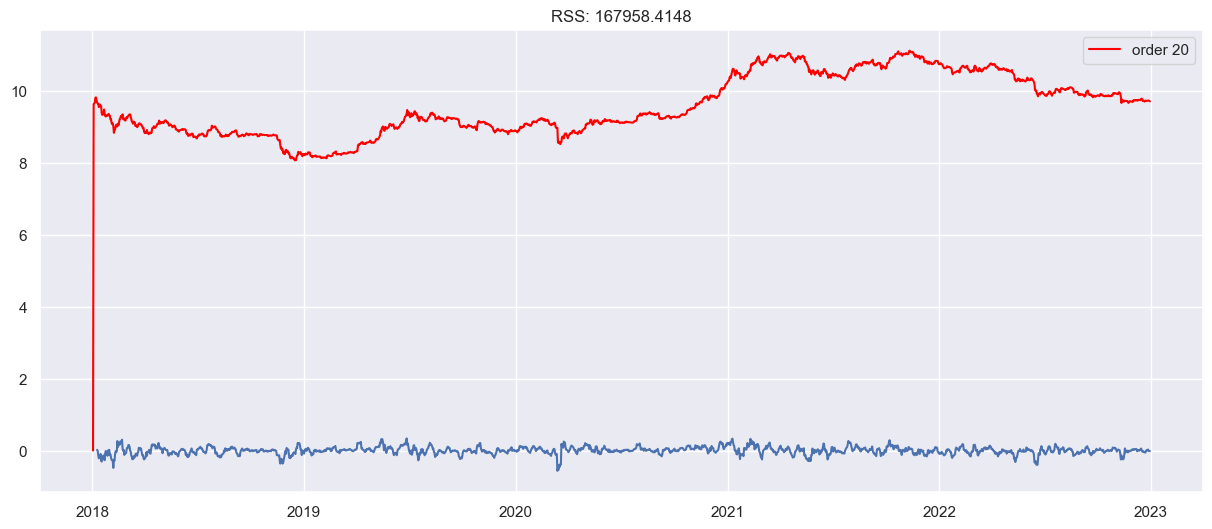

In [69]:
import statsmodels.api as smapi
model = smapi.tsa.arima.ARIMA(ts_logtransformed, order=(1,1,2))
results_AR = model.fit()

#model = ARIMA(ts_logtransformed, order=(20, 1, 0))  
#results_AR = model.fit(disp =-1)  

plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 20')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')


/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

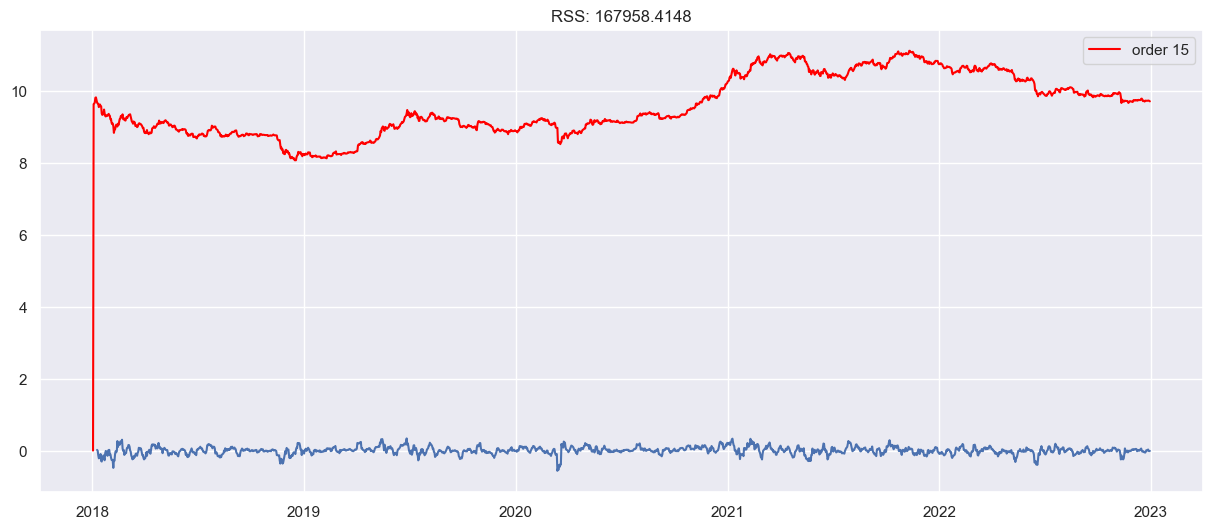

In [70]:
import statsmodels.api as smapi
model = smapi.tsa.arima.ARIMA(ts_logtransformed, order=(1,1,2))
results_AR = model.fit()


#model = ARIMA(ts_logtransformed, order=(15, 1, 0))  
#results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 15')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

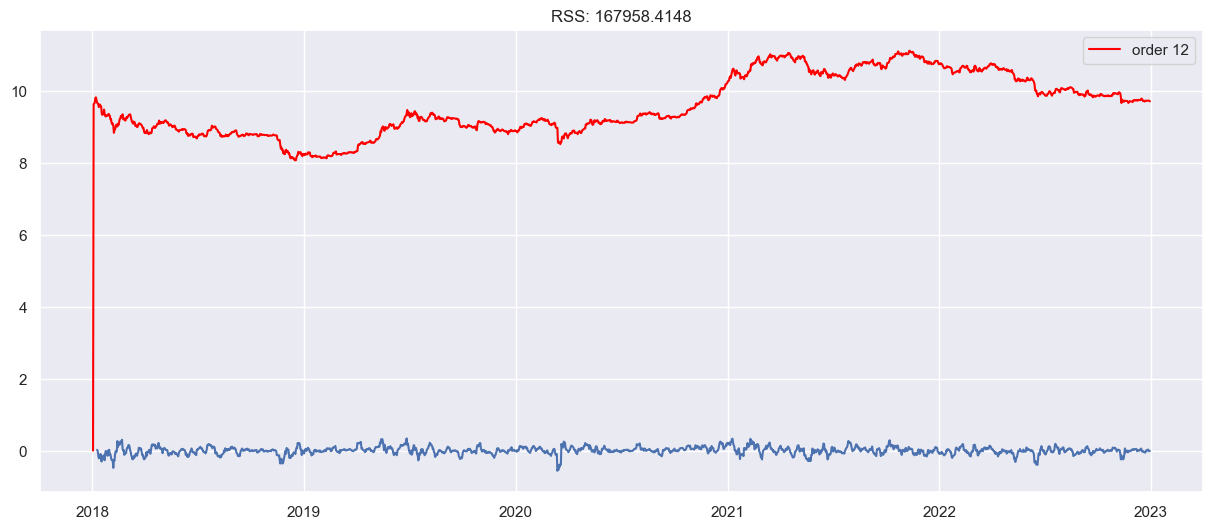

In [71]:
import statsmodels.api as smapi
model = smapi.tsa.arima.ARIMA(ts_logtransformed, order=(1,1,2))
results_AR = model.fit()

#model = ARIMA(ts_logtransformed, order=(12, 1, 0))  
#results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 12')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

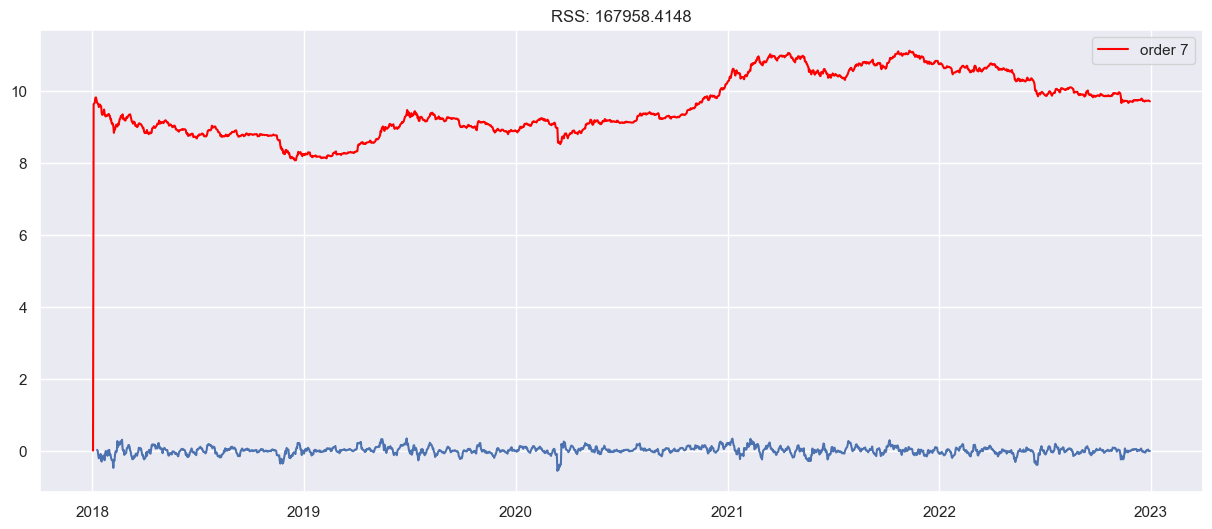

In [72]:
import statsmodels.api as smapi
model = smapi.tsa.arima.ARIMA(ts_logtransformed, order=(1,1,2))
results_AR = model.fit()

#model = ARIMA(ts_logtransformed, order=(7, 1, 0))  
#results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 7')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

In [73]:
import statsmodels.api as smapi
model = smapi.tsa.arima.ARIMA(ts_logtransformed, order=(1,1,2))
results_AR = model.fit()


model = ARIMA(ts_logtransformed, order=(8, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 8')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc = 'best')

/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

TypeError: fit() got an unexpected keyword argument 'disp'

/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

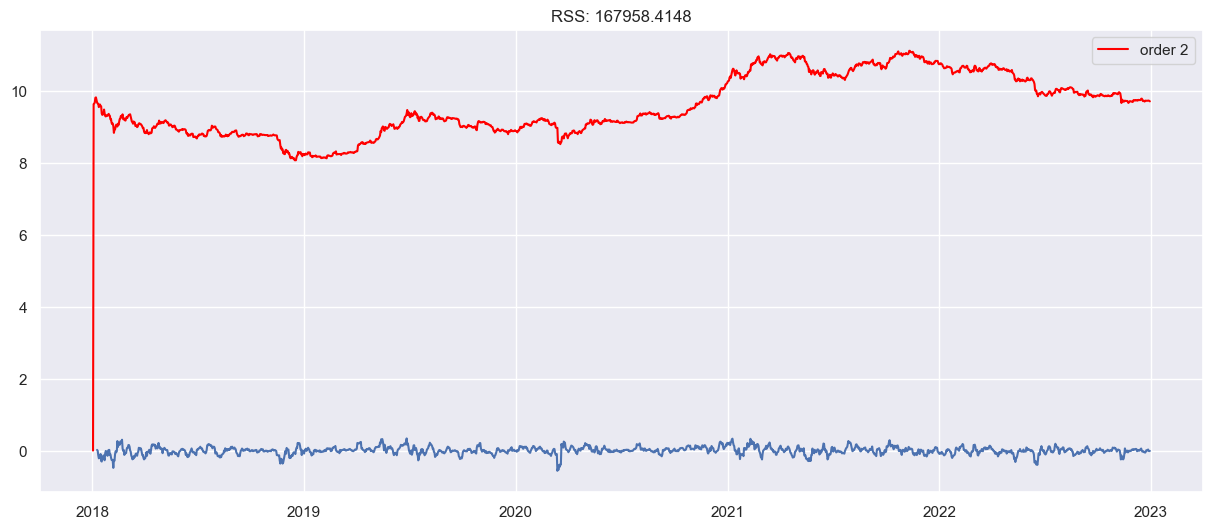

In [74]:
import statsmodels.api as smapi
model = smapi.tsa.arima.ARIMA(ts_logtransformed, order=(1,1,2))
results_AR = model.fit()

#model = ARIMA(ts_logtransformed, order=(2, 1, 0))  
#results_AR = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color='red', label = 'order 2')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc ='best')

In [75]:
print(results_AR.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1824
Model:                 ARIMA(1, 1, 2)   Log Likelihood                3335.621
Date:                Sun, 29 Jan 2023   AIC                          -6663.242
Time:                        22:45:31   BIC                          -6641.209
Sample:                             0   HQIC                         -6655.114
                               - 1824                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6891      0.201      3.422      0.001       0.294       1.084
ma.L1         -0.7375      0.202     -3.647      0.000      -1.134      -0.341
ma.L2          0.0695      0.020      3.466      0.0

# MA model

/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

Text(0.5, 1.0, 'RSS: 167958.4148')

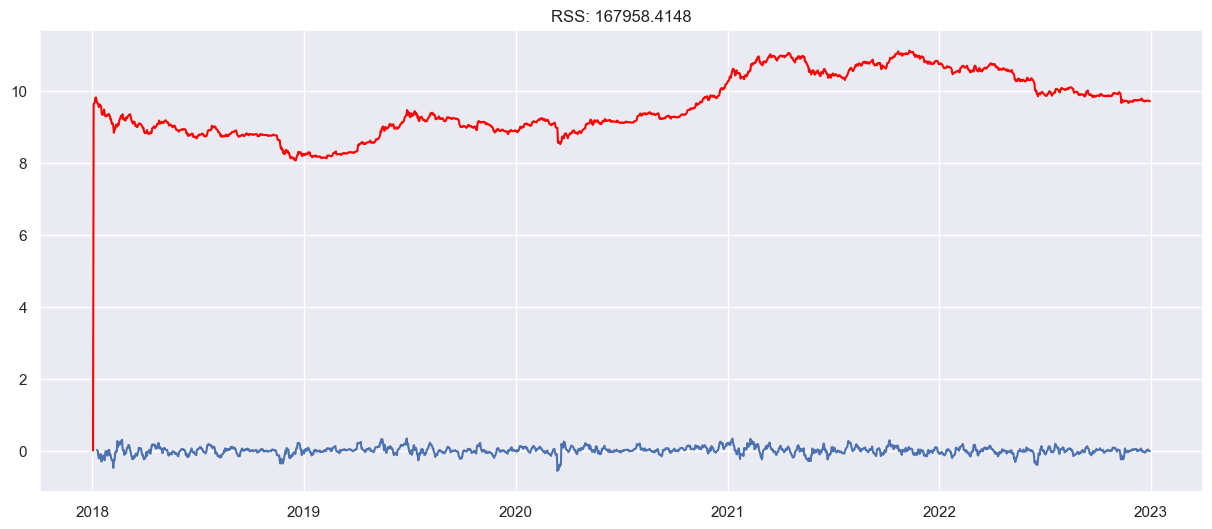

In [78]:
import statsmodels.api as smapi
model = smapi.tsa.arima.ARIMA(ts_logtransformed, order=(1,1,2))
results_MA = model.fit()

#model = ARIMA(ts_logtransformed, order=(0, 1,18)) 
#results_MA = model.fit(disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_MA.fittedvalues, color='red')
RSS = results_MA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))


In [79]:
#model summary
print(results_MA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1824
Model:                 ARIMA(1, 1, 2)   Log Likelihood                3335.621
Date:                Sun, 29 Jan 2023   AIC                          -6663.242
Time:                        22:49:27   BIC                          -6641.209
Sample:                             0   HQIC                         -6655.114
                               - 1824                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6891      0.201      3.422      0.001       0.294       1.084
ma.L1         -0.7375      0.202     -3.647      0.000      -1.134      -0.341
ma.L2          0.0695      0.020      3.466      0.0

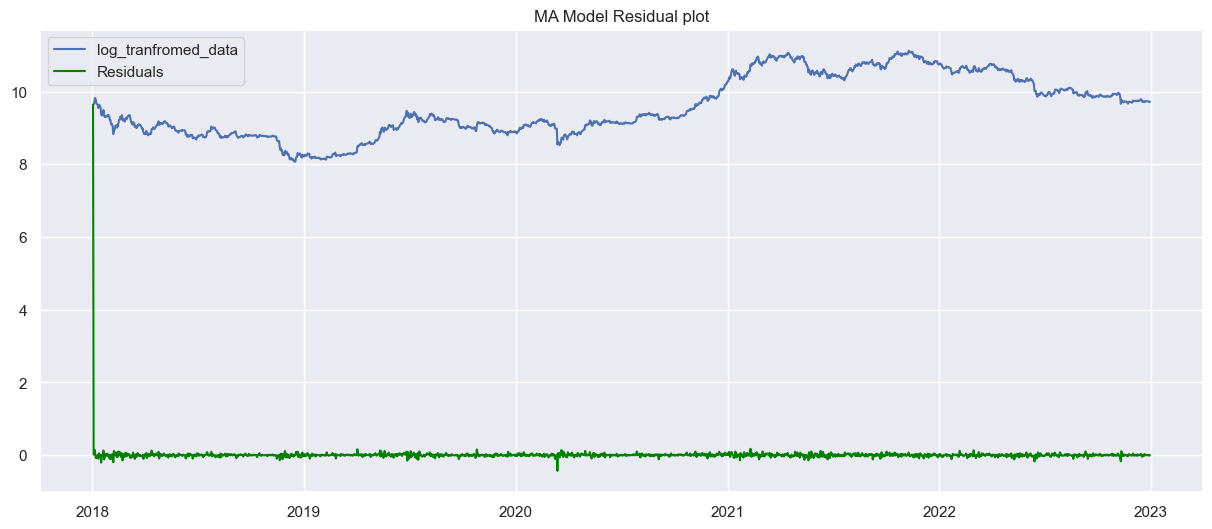

In [80]:
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_MA.resid, color ='green',label= 'Residuals')
plt.title('MA Model Residual plot')
plt.legend(loc = 'best')

count    1824.000000
mean        0.005325
std         0.228963
min        -0.431081
25%        -0.015760
50%         0.001056
75%         0.017361
max         9.637041
dtype: float64


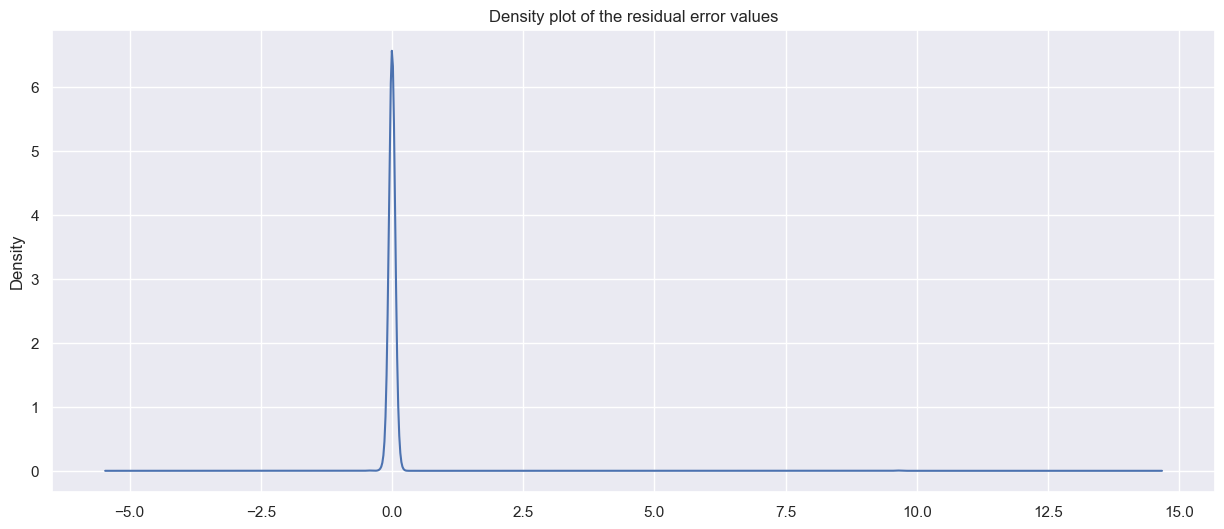

In [81]:
results_MA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_MA.resid.describe())

# ARIMA Combined model

/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

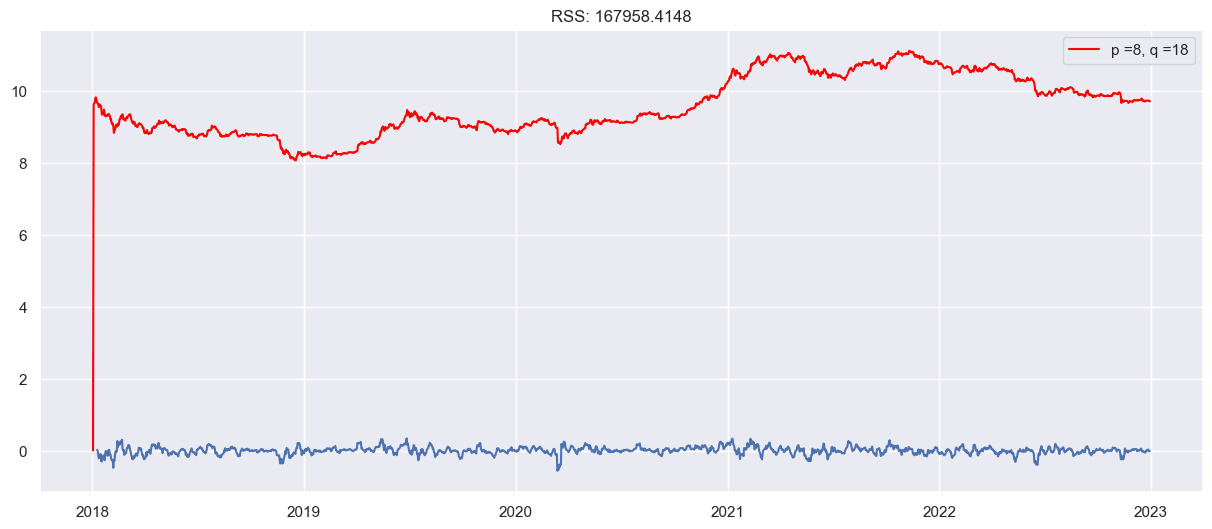

In [87]:
#model = smapi.tsa.arima.ARIMA(ts_logtransformed, order=(1,1,2))
#results_MA = model.fit()
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(ts_logtransformed, order=(1,1,2))
results_ARIMA = model.fit()

#model = ARIMA(ts_logtransformed, order=(8, 1, 18))  
#results_ARIMA = model.fit(trend= 'nc', disp=-1)  
plt.plot(ts_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color='red', label = 'p =8, q =18')
RSS =results_ARIMA.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace=True)
plt.title('RSS: %.4f'% sum(RSS**2))
plt.legend(loc='best')

model = ARIMA(ts_logtransformed, order=(20, 1, 18)) results_ARIMA = model.fit(disp=-1)
plt.plot(ts_diff_logtrans) plt.plot(results_ARIMA.fittedvalues, color='red', label = 'order 15') RSS = results_ARIMA.fittedvalues-ts_diff_logtrans RSS.dropna(inplace=True) plt.title('RSS: %.4f'% sum(RSS**2)) plt.legend(loc = 'best')

Searching ARIMA parameters.
The above plots and models derive varying residual RSS. evaluating all these models might be difficult. SO we do a grid search on all possible ARIMA parameters. We look for different p,d,q combinations, and find the best combination. p = 7 ,10,13,16,19 d = 0 to 2 taking 10 runs of the model and this will take some time to run

The following markdown is a python code that helps to evaluate different model performances to evaluate best ARIMA hyperparameters

import warnings def evaluate_arima_model(data_set, arima_order): model = ARIMA(data_set, order=arima_order) results_ARIMA = model.fit(disp=-1) RSS_diff = results_ARIMA.fittedvalues-ts_diff_logtrans RSS = RSS_diff**2 return RSS def evaluate_models(dataset, p_values, d_values): best_score, best_cfg = float("inf"), None for p in p_values: for d in d_values: order = (p,d,18) try: rss = evaluate_arima_model(dataset, order) if rss < best_score: best_score, best_cfg = rss, order print('ARIMA%s RSS=%.3f' % (order,rss)) except: continue print('Best ARIMA%s RSS=%.3f' % (best_cfg, best_score)) p_values = range(8,20,3) d_values = range(0,3) warnings.filterwarnings('ignore') evaluate_models(ts_logtransformed,p_values,d_values)

We can derive the Summary of the ARIMA model as follows explaining the results

In [88]:
#model summary
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1824
Model:                 ARIMA(1, 1, 2)   Log Likelihood                3335.621
Date:                Sun, 29 Jan 2023   AIC                          -6663.242
Time:                        22:59:20   BIC                          -6641.209
Sample:                             0   HQIC                         -6655.114
                               - 1824                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6891      0.201      3.422      0.001       0.294       1.084
ma.L1         -0.7375      0.202     -3.647      0.000      -1.134      -0.341
ma.L2          0.0695      0.020      3.466      0.0

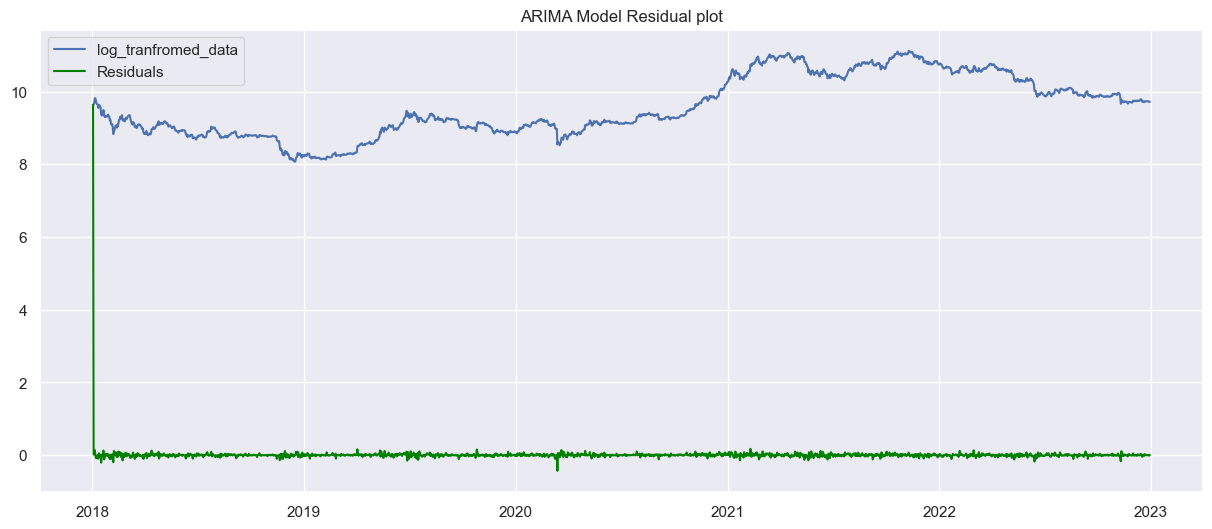

In [89]:
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_ARIMA.resid, color ='green',label= 'Residuals')
plt.title('ARIMA Model Residual plot')
plt.legend(loc = 'best')

count    1824.000000
mean        0.005325
std         0.228963
min        -0.431081
25%        -0.015760
50%         0.001056
75%         0.017361
max         9.637041
dtype: float64


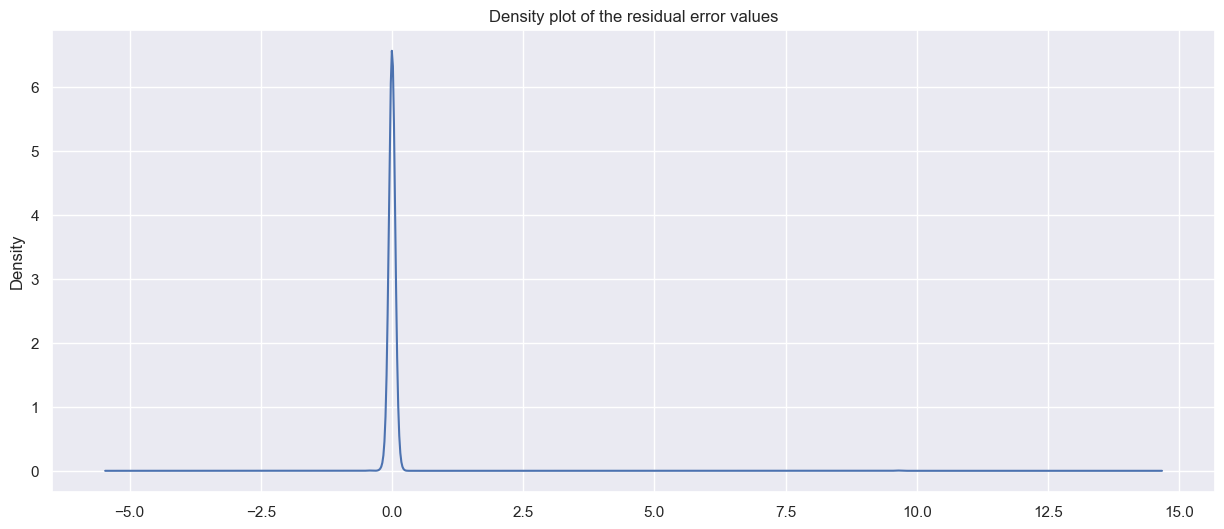

In [90]:
results_ARIMA.resid.plot(kind='kde')
plt.title('Density plot of the residual error values')
print(results_ARIMA.resid.describe())

In [ ]:
#test = pd.read_csv("../input/bitcoin_price_1week_Test - Test.csv",index_col= 'Date')
#test.index = pd.to_datetime(test.index)
#test = test['Close']
#test = test.sort_index()
#test

# Using Combined ARIMA model to predict and forecast

In [92]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2018-01-02    0.000000
2018-01-03    9.637041
2018-01-04    9.653176
2018-01-05    9.678279
2018-01-06    9.811472
dtype: float64


In [93]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2018-01-02     0.000000
2018-01-03     9.637041
2018-01-04    19.290216
2018-01-05    28.968495
2018-01-06    38.779967
dtype: float64


In [94]:
predictions_ARIMA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2018-01-02     9.637041
2018-01-03    19.274081
2018-01-04    28.927257
2018-01-05    38.605536
2018-01-06    48.417008
dtype: float64

In [100]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))

NameError: name 'data' is not defined

In [101]:
dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), pd.Timestamp('2017-08-07')]

forecast = pd.Series(results_ARIMA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


KeyError: 0

In [102]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(data)))
plt.legend(loc = 'best')

NameError: name 'forecast' is not defined

# Using MA model to predict and forecast

Here we can see that the AR and MA, and the combined ARIMA models have almost the same RSS but MA model is significantly better in computational performance. So we use it to predict the price.

In [103]:
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_MA_diff.head())

Date
2018-01-02    0.000000
2018-01-03    9.637041
2018-01-04    9.653176
2018-01-05    9.678279
2018-01-06    9.811472
dtype: float64


In [104]:
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print(predictions_MA_diff_cumsum.head())

Date
2018-01-02     0.000000
2018-01-03     9.637041
2018-01-04    19.290216
2018-01-05    28.968495
2018-01-06    38.779967
dtype: float64


!!!!Notice that the predictions arent starting from 2013-04-28. This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base numberNotice that the predictions arent starting from 2013-04-28. This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number

In [105]:
predictions_MA_log = pd.Series(ts_logtransformed.iloc[0], index=ts_logtransformed.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum,fill_value=0)
predictions_MA_log.head()

Date
2018-01-02     9.637041
2018-01-03    19.274081
2018-01-04    28.927257
2018-01-05    38.605536
2018-01-06    48.417008
dtype: float64

In [108]:
predictions_MA = np.exp(predictions_MA_log)
plt.plot(data)
plt.plot(predictions_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_MA-data)**2)/len(data)))

NameError: name 'data' is not defined

In [109]:
dates = [pd.Timestamp('2018-01-01'), pd.Timestamp('2018-01-02'), pd.Timestamp('2018-01-03'),pd.Timestamp('2018-01-04'), pd.Timestamp('2018-01-05'), pd.Timestamp('2018-01-06'), pd.Timestamp('2018-01-07')]

forecast = pd.Series(results_MA.forecast(steps=7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

/Users/fareenamughal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


KeyError: 0

In [110]:
plt.plot(forecast, color ='green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast-test)**2)/len(data)))
plt.legend(loc = 'best')

NameError: name 'forecast' is not defined

Much work has to be done on eliminating hte seasonality in the above time series. More methods licke curve fitting and differnce can be extended to identify seasonality and remove the seasonal component from the data.

An improved model may be to subtract the average coin price from the same calendar month in the previous year, rather than the same day.

We can start off by resampling the dataset to a monthly average price. The resampling methods handles the concept of leap years while eliminating the offset (for example feb has only 28 days ).

In [111]:
monthly_mean = data.resample('M').mean()
monthly_mean
print(monthly_mean.head(13))
monthly_mean.plot()

NameError: name 'data' is not defined

# One more alternative to derive the forecasting performance

In [112]:
test_logtransformed = np.log(test)

NameError: name 'test' is not defined

In [113]:
history = [x for x in ts_logtransformed]
predictions = list()
for t in range(len(test)):
    output = results_MA.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_logtransformed[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_logtransformed, predictions)
print('Test MSE: %.3f' % error)

NameError: name 'test' is not defined

Much work has to be done on eliminating hte seasonality in the above time series. More methods licke curve fitting and differnce can be extended to identify seasonality and remove the seasonal component from the data.

An improved model may be to subtract the average coin price from the same calendar month in the previous year, rather than the same day.

We can start off by resampling the dataset to a monthly average price. The resampling methods handles the concept of leap years while eliminating the offset (for example feb has only 28 days ).

In [114]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [115]:
data.head()

NameError: name 'data' is not defined

In [116]:
data_prophet = data.copy()
data_prophet = pd.DataFrame(data_prophet)
data_prophet.reset_index(drop=False, inplace=True)
data_prophet.columns =['ds','y']
data_prophet

NameError: name 'data' is not defined

In [117]:
m = Prophet()
m.fit(data_prophet)
future = m.make_future_dataframe(periods=7, freq='D')
forecast = m.predict(future)
m.plot(forecast)
data.plot()

NameError: name 'Prophet' is not defined

In [118]:
m.plot_components(forecast)

NameError: name 'm' is not defined

In [119]:
forecast.columns

NameError: name 'forecast' is not defined

In [120]:
forecasted_values = forecast[['ds', 'yhat']].tail(7)

NameError: name 'forecast' is not defined

In [121]:
forecasted_values = forecasted_values.set_index('ds')
forecasted_values.columns = ['y']
forecasted_values

NameError: name 'forecasted_values' is not defined

In [122]:
mean_squared_error(forecasted_values['y'],test)

NameError: name 'forecasted_values' is not defined

RNN
In Progress
from keras.models import Sequential from keras.layers import Dense from keras.layers import LSTM from sklearn.preprocessing import MinMaxScaler

The Model needs further improvement. Will have to work on few other approaches such as Facebooks Prophet approach and Keras Starter. Much information on theses approaches can be found on https://research.fb.com/prophet-forecasting-at-scale/ and https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/